# Seattle Library Online Checkouts in the time of COVID-19

## Import the Data from the [Seattle Open Data API](https://data.seattle.gov/Community/Checkouts-by-Title/tmmm-ytt6)


In [1]:
import pandas as pd
import numpy as np
from sodapy import Socrata
import matplotlib.pyplot as plt 
import scipy.stats as stats

%matplotlib inline

plt.style.use('ggplot')

In [6]:

client = Socrata('data.seattle.gov',
                  app_token='h5vKraDOpWIZy3vvPhZ6hBQab')

results = client.get('tmmm-ytt6', select="usageclass, checkoutyear, checkoutmonth, checkouts, checkouttype", where='checkoutyear>=2016 AND usageclass="Digital"', limit = 10000000)

In [7]:
len(results)

2151128

## Moving Library API Results into Pandas DataFrame

In [8]:
library_df = pd.DataFrame.from_records(results)

In [9]:
library_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2151128 entries, 0 to 2151127
Data columns (total 5 columns):
checkoutmonth    object
checkouts        object
checkouttype     object
checkoutyear     object
usageclass       object
dtypes: object(5)
memory usage: 82.1+ MB


In [49]:
library_df = library_df.astype({'checkouts': 'int64','checkoutmonth': 'int64','checkoutyear': 'int64' }, inplace=True)

In [50]:
library_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2151128 entries, 0 to 2151127
Data columns (total 5 columns):
checkoutmonth    int64
checkouts        int64
checkouttype     object
checkoutyear     int64
usageclass       object
dtypes: int64(3), object(2)
memory usage: 82.1+ MB


## Grouping by Month and Year:  
 

In [30]:
March_2020 = library_df[(library_df['checkoutyear']==2020) & (library_df['checkoutmonth']==3)]

In [51]:
March_2020.groupby(['checkoutyear', 'checkoutmonth']).sum()

,,checkouts
checkoutyear,checkoutmonth,
2020,3,321320


In [52]:
checkouts_per_month = library_df.groupby(['checkoutyear', 'checkoutmonth']).sum()

In [54]:
checkouts_per_month = checkouts_per_month.sort_values(by=['checkoutyear', 'checkoutmonth'])

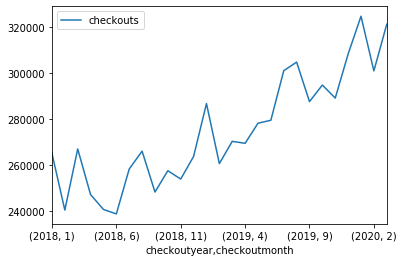

In [59]:
checkouts_per_month.plot()

In [62]:
sum_list = list(checkouts_per_month['checkouts'])

In [63]:
rate_list = []
for i in range(len(sum_list)-1):
    rate = sum_list[i+1]/sum_list[i]
    rate_list.append(rate)

In [64]:
rate_list.insert(0,np.nan)

In [65]:
checkouts_per_month['Rate of Increase'] = rate_list

In [66]:
checkouts_per_month

checkouts  Rate of Increase
checkoutyear checkoutmonth                             
2018         1                 265077               NaN
             2                 240372          0.906801
             3                 266994          1.110753
             4                 247109          0.925523
             5                 240636          0.973805
             6                 238697          0.991942
             7                 258246          1.081899
             8                 266043          1.030192
             9                 248227          0.933033
             10                257505          1.037377
             11                253878          0.985915
             12                263737          1.038834
2019         1                 286775          1.087352
             2                 260620          0.908796
             3                 270307          1.037169
             4                 269466          0.996889
             5                 278206          1.032435
             6                 279500          1.004651
             7                 301073          1.077184
             8                 304842          1.012519
             9                 287627          0.943528
             10                294843          1.025088
             11                289152          0.980698
             12                308348          1.066387
2020         1                 324816          1.053407
             2                 301015          0.926725
             3                 321320          1.067455

In [67]:
checkouts_per_month_type = library_df.groupby(['checkouttype','checkoutyear', 'checkoutmonth']).sum()

In [70]:
checkouts_per_month_type = checkouts_per_month_type.reset_index()

In [72]:
OD_checkouts = checkouts_per_month_type[checkouts_per_month_type['checkouttype']=='OverDrive']

In [73]:
OD_sum_list = list(OD_checkouts['checkouts'])

OD_rate_list = []
for i in range(len(sum_list)-1):
    rate = OD_sum_list[i+1]/sum_list[i] -1
    OD_rate_list.append(rate)

In [74]:
OD_rate_list.insert(0,0)

In [76]:
OD_checkouts.reset_index()

,index,checkouttype,checkoutyear,checkoutmonth,checkouts
0,9,OverDrive,2018,1,225617
1,10,OverDrive,2018,2,204147
2,11,OverDrive,2018,3,227654
3,12,OverDrive,2018,4,224139
4,13,OverDrive,2018,5,227546
5,14,OverDrive,2018,6,234192
6,15,OverDrive,2018,7,253912
7,16,OverDrive,2018,8,260826
8,17,OverDrive,2018,9,243473
9,18,OverDrive,2018,10,250276


In [78]:
OD_checkouts.set_index(np.arange(0,27,1))

,checkouttype,checkoutyear,checkoutmonth,checkouts
0,OverDrive,2018,1,225617
1,OverDrive,2018,2,204147
2,OverDrive,2018,3,227654
3,OverDrive,2018,4,224139
4,OverDrive,2018,5,227546
5,OverDrive,2018,6,234192
6,OverDrive,2018,7,253912
7,OverDrive,2018,8,260826
8,OverDrive,2018,9,243473
9,OverDrive,2018,10,250276


In [79]:
OD_checkouts['Rate of Increase'] = OD_rate_list

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


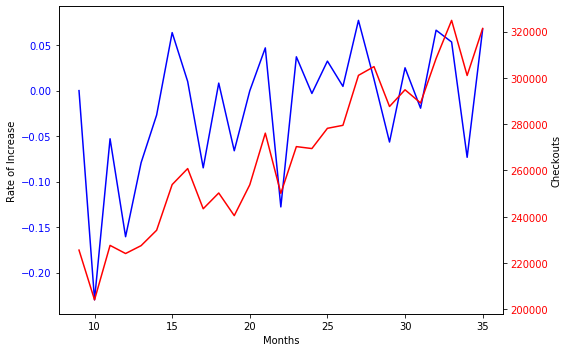

In [84]:
fig, ax1 = plt.subplots(figsize=(8,5))

color = 'blue'
ax1.set_xlabel('Months')
ax1.set_ylabel('Rate of Increase')  # we already handled the x-label with ax1
ax1.plot(OD_checkouts.index, OD_checkouts['Rate of Increase'], color=color)
ax1.tick_params(axis='y', labelcolor=color)


ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis


color = 'red'

ax2.set_ylabel('Checkouts')
ax2.plot(OD_checkouts.index, OD_checkouts['checkouts'], color=color)
ax2.tick_params(axis='y', labelcolor=color)



fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

In [89]:
OD_checkouts.iloc[0:25, 4].mean()

-0.018767377653160548

In [87]:
OD_checkouts.iloc[0:25, 4].std()

0.07396906419295081

In [90]:
OD_checkouts.iloc[26, 4]

0.06745511021045458

## New Pull to get 2016, 2017 Data

In [183]:

client = Socrata('data.seattle.gov',
                  app_token='h5vKraDOpWIZy3vvPhZ6hBQab')

results2 = client.get('tmmm-ytt6', select="usageclass, checkoutyear, checkoutmonth, checkouts, checkouttype", where='checkoutyear BETWEEN 2016 AND 2017 AND usageclass="Digital"', limit = 10000000)

In [184]:
library_df2 = pd.DataFrame.from_records(results2)

In [185]:
library_df2 = library_df2.astype({'checkouts': 'int64','checkoutmonth': 'int64','checkoutyear': 'int64'}, inplace=True)

In [186]:
library_combined = pd.concat([library_df, library_df2])

In [187]:
#library_combined.set_index(np.arange(0,len(library_combined),1))

In [228]:
library_combined.to_csv('~/galvanize/capstone/capstone_one/library_combined.csv')



In [3]:
library_combined = pd.read_csv('~/galvanize/capstone/capstone_one/library_combined.csv', index_col=0)

//anaconda3/lib/python3.7/site-packages/numpy/lib/arraysetops.py:569: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


In [188]:
library_combined['checkoutyear'].unique()

array([2018, 2019, 2020, 2016, 2017])

In [4]:

#Group by year and month and sum checkouts, then sort into chronlogical order    
ckouts_per_month_type = library_combined.groupby(['checkouttype','checkoutyear', 'checkoutmonth']).sum()
ckouts_per_month_type = ckouts_per_month_type.sort_values(by=['checkouttype','checkoutyear', 'checkoutmonth'])
ckouts_per_month_type.reset_index(inplace=True)



#Isolate checkout type to Overdrive and set index 
OD_ckouts = ckouts_per_month_type[ckouts_per_month_type['checkouttype']=='OverDrive']
OD_ckouts.set_index(np.arange(0,len(OD_ckouts),1), inplace=True)

#Create a new colum with the increase in online checkouts month over month 
OD_ckouts = pd.DataFrame(OD_ckouts)
OD_sum_list = list(OD_ckouts['checkouts'])
OD_rates = []


for i in range(len(OD_sum_list)-1):
    rate = (OD_sum_list[i+1]/OD_sum_list[i])-1
    OD_rates.append(rate)
    
OD_rates.insert(0,0)
OD_ckouts['Rate of Increase'] = OD_rates

In [22]:
OD_ckouts

,checkouttype,checkoutyear,checkoutmonth,checkouts,Rate of Increase
0,OverDrive,2016,1,165312,0.000000
1,OverDrive,2016,2,154088,-0.067896
2,OverDrive,2016,3,165164,0.071881
3,OverDrive,2016,4,161423,-0.022650
4,OverDrive,2016,5,168296,0.042578
5,OverDrive,2016,6,167416,-0.005229
6,OverDrive,2016,7,176392,0.053615
7,OverDrive,2016,8,179073,0.015199
8,OverDrive,2016,9,169489,-0.053520
9,OverDrive,2016,10,169215,-0.001617


In [5]:
OD_mean = OD_ckouts.iloc[0:49,4].mean()

In [6]:
OD_std = OD_ckouts.iloc[0:49,4].std()

In [7]:
OD_March_2020 = OD_ckouts.iloc[50,4]

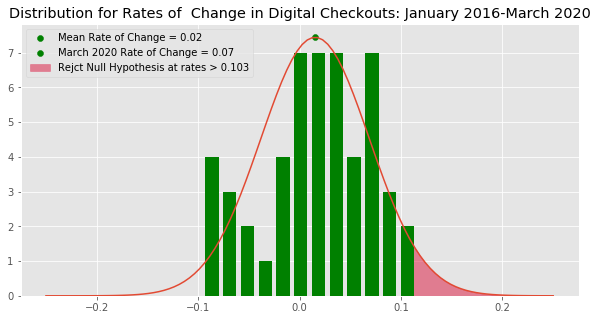

In [21]:
fig, ax = plt.subplots(figsize=(10,5))

OD_norm = stats.norm(OD_mean, OD_std)
x = np.linspace(-.25,.25,100)

ax.set_title('Distribution for Rates of  Change in Digital Checkouts: January 2016-March 2020')
ax.scatter(OD_mean, OD_norm.pdf(OD_mean), color='g', label='Mean Rate of Change = {:2.2f}'.format(OD_norm.ppf(.5)))
ax.plot(x, OD_norm.pdf(x))
ax.scatter(OD_March_2020, OD_norm.pdf(OD_March_2020), color='g', label ='March 2020 Rate of Change = {:2.2f}'.format(OD_March_2020))
ax.fill_between(x, OD_norm.pdf(x), 
                where=(x >= OD_norm.ppf(.95)), color="crimson", alpha=0.5, label='Rejct Null Hypothesis at rates > {:2.3f}'.format(OD_norm.ppf(.95)))
ax.hist(OD_ckouts['Rate of Increase'], bins=12 , color='g', rwidth=.75)
ax.legend(loc='best')



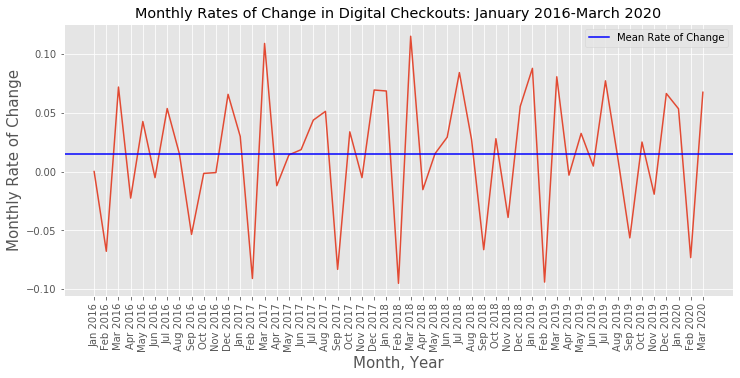

In [338]:
fig, ax1 = plt.subplots(figsize=(12,5))


months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
years = [2016, 2017, 2018, 2019, 2020] 
l = []
for y in range(len(years)):
    for m in range(len(months)):
        my = str(months[m]+" "+ str(years[y]))
        l.append(my)

dates_axis = l[:51]

ax1.set_title('Monthly Rates of Change in Digital Checkouts: January 2016-March 2020')
ax1.set_xlabel('Month, Year', size= 15)
ax1.set_ylabel('Monthly Rate of Change', size=15)  # we already handled the x-label with ax1
ax1.plot(OD_ckouts.index, OD_ckouts['Rate of Increase'])
ax1.axhline(OD_mean, label='Mean Rate of Change', color='b')
ax1.set_xticks(OD_ckouts.index)
ax1.set_xticklabels(dates_axis, rotation='vertical')
plt.legend()


In [301]:
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
years = [2016, 2017, 2018, 2019, 2020] 
l = []
for y in range(len(years)):
    for m in range(len(months)):
        my = str(months[m]+" "+ str(years[y]))
        l.append(my)

dates_axis = l[:51]


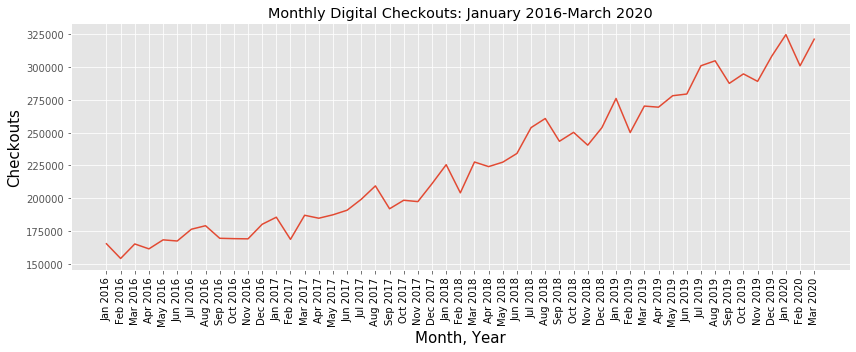

In [400]:
fig, ax = plt.subplots(figsize=(12,5))


ax.set_title('Monthly Digital Checkouts: January 2016-March 2020')
ax.set_xlabel('Month, Year', size = 15, color='black')
ax.set_ylabel('Checkouts', size=15, color='black')
ax.plot(OD_ckouts.index, OD_ckouts['checkouts'])
ax.set_xticks(OD_ckouts.index)
ax.set_xticklabels(dates_axis, rotation='vertical', color='black')
fig.tight_layout() 

Text(0.5, 0, 'Rate of Change')

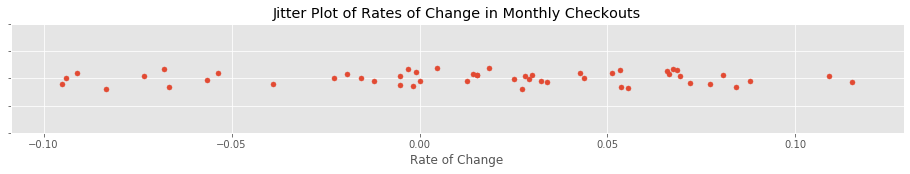

In [390]:
def one_dim_scatterplot(data, ax, jitter=0.2, **options):
    if jitter:
        jitter = np.random.uniform(-jitter, jitter, size=data.shape)
    else:
        jitter = np.repeat(0.0, len(data))
    ax.scatter(data, jitter, **options)
    ax.yaxis.set_ticklabels([])
    ax.set_ylim([-1, 1]) 

data = OD_ckouts['Rate of Increase']
fig, ax = plt.subplots(figsize=(16, 2))
ax.set_title('Jitter Plot of Rates of Change in Monthly Checkouts')
one_dim_scatterplot(data, ax, s=25)
ax.set_xlabel('Rate of Change')


In [9]:
print(OD_mean, OD_std)

0.015288394612110191 0.05359454844562853


In [17]:
from itertools import product

def log_likelihood_normal_two_parameters(mu, sigma):
    normal = stats.norm(mu, sigma)
    likelihoods = [normal.pdf(datum) for datum in OD_sum_list]
    return np.sum(np.log(likelihoods))




def minus_log_likelihood_normal_two_parameters(mu, sigma):
    return -log_likelihood_normal_two_parameters(mu, sigma)

# for mu, sigma in product([0.01,.05, .1, .15, .2, .25, .3 ], [.4,.45,.5,.55, .6, .65, .7]):
#     print("Log-Lik of Two Parameter Normal Model With mu={0}, sigma={1}: {2:3.2f}".format(
#         mu, sigma, log_likelihood_normal_two_parameters(mu, sigma)
#     ))
for mu, sigma in product([.05, .1, .15], [.5,.55, .6]):
    print("Log-Lik of Two Parameter Normal Model With mu={0}, sigma={1}: {2:3.2f}".format(
        mu, sigma, log_likelihood_normal_two_parameters(mu, sigma)
    ))

Log-Lik of Two Parameter Normal Model With mu=0.05, sigma=0.5: -inf
Log-Lik of Two Parameter Normal Model With mu=0.05, sigma=0.55: -inf
Log-Lik of Two Parameter Normal Model With mu=0.05, sigma=0.6: -inf
Log-Lik of Two Parameter Normal Model With mu=0.1, sigma=0.5: -inf
Log-Lik of Two Parameter Normal Model With mu=0.1, sigma=0.55: -inf
Log-Lik of Two Parameter Normal Model With mu=0.1, sigma=0.6: -inf
Log-Lik of Two Parameter Normal Model With mu=0.15, sigma=0.5: -inf
Log-Lik of Two Parameter Normal Model With mu=0.15, sigma=0.55: -inf
Log-Lik of Two Parameter Normal Model With mu=0.15, sigma=0.6: -inf


//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  


In [23]:
ckouts_per_month_type 


,checkouttype,checkoutyear,checkoutmonth,checkouts
0,Freegal,2016,1,21689
1,Freegal,2016,2,21005
2,Freegal,2016,3,20793
3,Freegal,2016,4,19661
4,Freegal,2016,5,21414
5,Freegal,2016,6,18519
6,Freegal,2016,7,18433
7,Freegal,2016,8,18826
8,Freegal,2016,9,17982
9,Freegal,2016,10,20110


In [41]:
x =library_combined.groupby(['checkouttype','checkoutyear', 'checkoutmonth']).sum()

In [42]:
y = x.reset_index()

In [43]:
y[y['checkouttype']=='OverDrive']


,checkouttype,checkoutyear,checkoutmonth,checkouts
57,OverDrive,2016,1,165312
58,OverDrive,2016,2,154088
59,OverDrive,2016,3,165164
60,OverDrive,2016,4,161423
61,OverDrive,2016,5,168296
62,OverDrive,2016,6,167416
63,OverDrive,2016,7,176392
64,OverDrive,2016,8,179073
65,OverDrive,2016,9,169489
66,OverDrive,2016,10,169215
